<a href="https://colab.research.google.com/github/TapanManu/Pytorch-Intro/blob/master/MNIST-pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
from torchvision.datasets import MNIST


In [0]:
#download training datadset
dataset=MNIST(root='data/',download=True)

In [0]:
len(dataset)

60000

In [0]:
test_dataset=MNIST(root='data/',train=False)
len(test_dataset)

10000

In [0]:
print(dataset[0])

(<PIL.Image.Image image mode=L size=28x28 at 0x7F99CB9499E8>, 5)


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline


label: 5


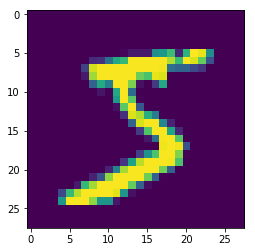

In [0]:
image,label=dataset[0]
plt.imshow(image)
print("label:",label)



label: 3


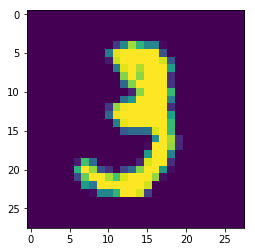

In [0]:
image,label=dataset[10]
plt.imshow(image)
print("label:",label)


In [0]:
#converting images into tensors
import torchvision.transforms as transforms

In [0]:
dataset=MNIST(root='data/',train=True,transform=transforms.ToTensor())

In [0]:
img_tensor,label=dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


In [0]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


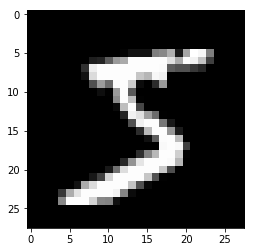

In [0]:
#plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0],cmap="gray")

In [0]:
import numpy as np
def split_indices(n,val_pct):
  #determine size of validation set
  n_val=int(val_pct*n)
  #create random permutation of 0 to n-1
  idxs=np.random.permutation(n)
  #pick first n_val indices for validation set
  return idxs[n_val:],idxs[:n_val]


In [0]:
train_indices,val_indices=split_indices(len(dataset),val_pct=0.2)

In [0]:
print (train_indices)
print(val_indices)

[53964 44611 15217 ... 10834 21642 35957]
[55322 41314 11546 ... 33333 56430 23573]


In [0]:
print(len(train_indices),len(val_indices))
print("sample val indices:",val_indices[:20])

48000 12000
sample val indices: [55322 41314 11546  7360 15650 34510 59136 50906 48292  6808 55694 15747
 43621 21005 40390 17592 56283  3465 59625 36456]


In [0]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [0]:
batch_size=100
#training sampler and data loader
train_sampler=SubsetRandomSampler(train_indices)
train_loader=DataLoader(dataset,batch_size,sampler=train_sampler)
#validation sampler and data loader
val_sampler=SubsetRandomSampler(val_indices)
val_loader=DataLoader(dataset,batch_size,sampler=val_sampler)

In [0]:
import torch.nn as nn
input_size=28*28
num_classes=10
#logistic regression model
model=nn.Linear(input_size,num_classes)

In [0]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0330, -0.0138,  0.0098,  ..., -0.0334,  0.0107, -0.0313],
        [-0.0139,  0.0271,  0.0021,  ..., -0.0138, -0.0059, -0.0099],
        [-0.0041,  0.0306, -0.0300,  ..., -0.0193, -0.0179, -0.0316],
        ...,
        [-0.0251, -0.0230,  0.0240,  ...,  0.0229, -0.0015,  0.0324],
        [-0.0238, -0.0345, -0.0133,  ..., -0.0299, -0.0306, -0.0174],
        [-0.0271,  0.0283, -0.0314,  ..., -0.0070, -0.0015, -0.0182]],
       requires_grad=True)

In [0]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0161, -0.0083,  0.0196, -0.0297,  0.0166,  0.0045,  0.0106, -0.0158,
        -0.0302, -0.0168], requires_grad=True)

In [0]:
for images,labels in train_loader:
  print(labels)
  print(images.shape)
  outputs=model(images)
  break

tensor([2, 7, 1, 8, 2, 4, 8, 3, 4, 6, 8, 9, 8, 5, 3, 1, 7, 5, 3, 9, 5, 4, 4, 8,
        7, 9, 8, 7, 8, 0, 8, 8, 3, 2, 9, 6, 0, 0, 7, 8, 9, 6, 8, 6, 3, 0, 0, 8,
        5, 3, 1, 7, 1, 7, 9, 0, 0, 4, 2, 8, 4, 7, 5, 2, 5, 7, 5, 8, 8, 7, 6, 0,
        7, 9, 8, 0, 2, 1, 2, 9, 0, 1, 7, 6, 0, 2, 3, 4, 8, 5, 2, 1, 4, 7, 3, 8,
        0, 2, 2, 9])
torch.Size([100, 1, 28, 28])


In [0]:

class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(input_size,num_classes)
    
  def forward(self,xb):
    xb=xb.reshape(-1,784)
    out=self.linear(xb)
    return out
  
model=MnistModel()  

In [0]:
for images,labels in train_loader:
  outputs=model(images)
  break
  
print("outputs.shape:",outputs.shape)
print("sample outputs:",outputs[:2].data)
print(label)
  

outputs.shape: torch.Size([100, 10])
sample outputs: tensor([[-0.1983, -0.1588, -0.4137, -0.1209, -0.3877,  0.1550,  0.2816,  0.2077,
          0.0394, -0.2000],
        [-0.1047,  0.0472,  0.2326, -0.2413, -0.3579, -0.0644,  0.5186, -0.5013,
          0.2688,  0.1322]])
5


In [0]:
import torch.nn.functional as F
#apply softmax for each output row
probs=F.softmax(outputs,dim=1)
#look at sample probabilities
print("sample probabilities:",probs[:2].data)
#add up the probabilities of the output row
print("sum:",torch.sum(probs[0]).item())

sample probabilities: tensor([[0.0865, 0.0900, 0.0697, 0.0935, 0.0716, 0.1231, 0.1398, 0.1298, 0.1097,
         0.0864],
        [0.0869, 0.1011, 0.1217, 0.0758, 0.0674, 0.0904, 0.1620, 0.0584, 0.1262,
         0.1101]])
sum: 1.0


In [0]:
max_probs,preds=torch.max(probs,dim=1)
print(preds)
print(max_probs)

tensor([6, 6, 6, 6, 8, 6, 2, 6, 2, 6, 6, 6, 6, 5, 6, 6, 6, 6, 8, 5, 6, 6, 8, 6,
        6, 2, 5, 3, 5, 6, 6, 2, 2, 6, 3, 5, 6, 6, 3, 6, 6, 6, 8, 5, 6, 3, 3, 2,
        6, 6, 6, 6, 8, 6, 6, 6, 6, 8, 5, 7, 8, 5, 6, 6, 6, 6, 3, 6, 8, 7, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 1, 6, 6, 6, 6, 6, 6, 9, 8, 6, 5,
        1, 6, 8, 6])
tensor([0.1398, 0.1620, 0.1424, 0.1257, 0.1214, 0.1404, 0.1296, 0.1260, 0.1310,
        0.1473, 0.1429, 0.1250, 0.1382, 0.1181, 0.1536, 0.1286, 0.1243, 0.1167,
        0.1181, 0.1409, 0.1292, 0.1340, 0.1242, 0.1147, 0.1168, 0.1264, 0.1306,
        0.1234, 0.1381, 0.1327, 0.1308, 0.1165, 0.1125, 0.1508, 0.1250, 0.1243,
        0.1395, 0.1658, 0.1165, 0.1206, 0.1252, 0.1471, 0.1339, 0.1259, 0.1788,
        0.1182, 0.1404, 0.1239, 0.1305, 0.1381, 0.1518, 0.1590, 0.1191, 0.1293,
        0.1349, 0.1353, 0.1559, 0.1342, 0.1129, 0.1233, 0.1326, 0.1230, 0.1275,
        0.1168, 0.1151, 0.1551, 0.1179, 0.1285, 0.1208, 0.1112, 0.1305, 0.1569,
        0.1210, 0.1

In [0]:
print(labels)

tensor([4, 3, 6, 6, 7, 8, 1, 7, 1, 0, 6, 1, 9, 4, 9, 2, 4, 1, 6, 0, 7, 8, 3, 5,
        5, 1, 9, 1, 9, 9, 3, 5, 1, 3, 2, 2, 9, 4, 3, 3, 6, 3, 0, 0, 3, 8, 1, 1,
        9, 8, 7, 4, 1, 9, 6, 9, 7, 2, 7, 6, 2, 4, 1, 1, 2, 4, 9, 9, 7, 1, 4, 7,
        2, 5, 4, 4, 0, 6, 9, 9, 1, 2, 2, 3, 4, 6, 7, 5, 7, 2, 4, 4, 4, 4, 8, 4,
        5, 7, 3, 4])


In [0]:
def accuracy(l1,l2):
  return torch.sum(l1==l2).item()/len(l1)

In [0]:
accuracy(preds,labels)

0.07

In [0]:
loss_fn=F.cross_entropy
loss=loss_fn(outputs,labels)
print(loss)

tensor(2.3593, grad_fn=<NllLossBackward>)


In [0]:
learning_rate=1e-3
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [0]:
def loss_batch(model,loss_func,xb,yb,opt=None,metric=None):
  #calculate loss
  preds=model(xb)
  loss=loss_func(preds,yb)
  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()
  metric_result=None
  if metric is not None:
    metric_result=metric(preds,yb)
    
  return loss.item(),len(xb),metric_result  
    

In [0]:
def evaluate(model,loss_fn,valid_dl,metric=None):
  with torch.no_grad():
    #pass each batch through the model
    results=[loss_batch(model,loss_fn,xb,yb,metric=metric) for xb,yb in valid_dl]
    #seperate losses,counts and metrics
    losses,nums,metrics=zip(*results)
    #total size of datasets
    total=np.sum(nums)
    
    #avg.loss across batches
    avg_loss=np.sum(np.multiply(losses,nums))/total
    avg_metric=None
    if metric is not None:
      #average of metric across batches
      avg_metric=np.sum(np.multiply(metrics,nums))/total
  return avg_loss,total,avg_metric


In [0]:
def accuracy(outputs,labels):
  _,preds=torch.max(outputs,dim=1)
  return torch.sum(preds==labels).item()/len(preds)

In [0]:
val_loss,total,val_acc=evaluate(model,loss_fn,val_loader,metric=accuracy)
print("loss:{:.4f},accuracy:{:.4f}".format(val_loss,val_acc))

loss:2.3218,accuracy:0.1187


In [0]:
def fit(epochs,model,loss_fn,opt,train_dl,valid_dl,metric=None):
  for epoch in range(epochs):
    #training
    for xb,yb in train_dl:
      loss,_,_=loss_batch(model,loss_fn,xb,yb,opt)
    #evaluation
    result=evaluate(model,loss_fn,valid_dl,metric)
    val_loss,total,val_metric=result
    #print progress
    if metric is None:
      print('Epoch[{}/{}],loss:{:.4f}'.format(epoch+1,epochs,val_loss))
    else:
      print('Epoch[{}/{}],loss:{:.4f},{}:{:.4f}'.format(epoch+1,epochs,val_loss,metric.__name__,val_metric))

In [0]:
#redefine model and optimizer
model=MnistModel()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [0]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)

Epoch[1/5],loss:0.6818,accuracy:0.8528
Epoch[2/5],loss:0.6667,accuracy:0.8544
Epoch[3/5],loss:0.6528,accuracy:0.8562
Epoch[4/5],loss:0.6403,accuracy:0.8578
Epoch[5/5],loss:0.6287,accuracy:0.8594


shape: torch.Size([1, 28, 28])
label: 7


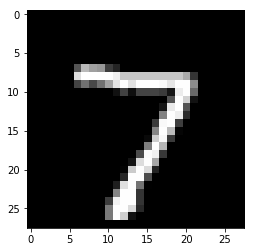

In [0]:
#define test dataset
test_dataset=MNIST(root='data/',train=False,transform=transforms.ToTensor())
img,label=test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('shape:',img.shape)
print('label:',label)

In [0]:
img.unsqueeze(0)

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [0]:
def predict_image(img,model):
  xb=img.unsqueeze(0)
  yb=model(xb)
  _,preds =torch.max(yb,dim=1)
  return preds[0].item()

label: 7 ,predicted: 7


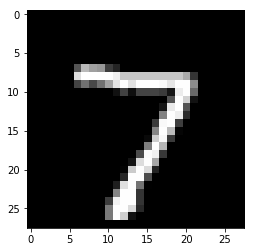

In [0]:
img,label=test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('label:',label,',predicted:',predict_image(img,model))

label: 7 ,predicted: 7
label: 2 ,predicted: 2
label: 1 ,predicted: 1
label: 0 ,predicted: 0
label: 4 ,predicted: 4
label: 1 ,predicted: 1
label: 4 ,predicted: 4
label: 9 ,predicted: 9
label: 5 ,predicted: 2
label: 9 ,predicted: 9
label: 0 ,predicted: 0
label: 6 ,predicted: 6
label: 9 ,predicted: 9
label: 0 ,predicted: 0
label: 1 ,predicted: 1
label: 5 ,predicted: 5
label: 9 ,predicted: 9
label: 7 ,predicted: 7
label: 3 ,predicted: 3
label: 4 ,predicted: 4
label: 9 ,predicted: 9
label: 6 ,predicted: 6
label: 6 ,predicted: 6
label: 5 ,predicted: 5
label: 4 ,predicted: 4
label: 0 ,predicted: 0
label: 7 ,predicted: 7
label: 4 ,predicted: 4
label: 0 ,predicted: 0
label: 1 ,predicted: 1
label: 3 ,predicted: 3
label: 1 ,predicted: 1
label: 3 ,predicted: 3
label: 4 ,predicted: 0
label: 7 ,predicted: 7
label: 2 ,predicted: 2
label: 7 ,predicted: 7
label: 1 ,predicted: 1
label: 2 ,predicted: 3
label: 1 ,predicted: 1
label: 1 ,predicted: 1
label: 7 ,predicted: 7
label: 4 ,predicted: 4
label: 2 ,p

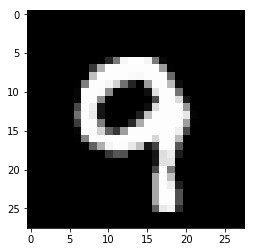

In [0]:
equal=0
number=100
for i in range(number):
  img,label=test_dataset[i]
  plt.imshow(img[0],cmap='gray')
  print('label:',label,',predicted:',predict_image(img,model,))
  if(label==predict_image(img,model,)):
    equal+=1

In [0]:
proximity=(equal/number)*100  
print(proximity)

86.0


In [0]:
torch.save(model.state_dict(),'mnist-logistic.pth')

In [0]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0236, -0.0162,  0.0261,  ..., -0.0337, -0.0214, -0.0341],
                      [-0.0266, -0.0035,  0.0267,  ...,  0.0203, -0.0256, -0.0187],
                      [ 0.0178, -0.0020, -0.0303,  ...,  0.0081,  0.0014, -0.0192],
                      ...,
                      [ 0.0276, -0.0013,  0.0329,  ...,  0.0133,  0.0026,  0.0314],
                      [ 0.0191, -0.0185,  0.0343,  ..., -0.0335,  0.0079, -0.0247],
                      [-0.0255, -0.0343, -0.0332,  ..., -0.0013, -0.0267,  0.0316]])),
             ('linear.bias',
              tensor([-0.0796,  0.1040,  0.0038, -0.0463,  0.0235,  0.0669, -0.0048,  0.0477,
                      -0.0909, -0.0241]))])

In [0]:
model2=MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0236, -0.0162,  0.0261,  ..., -0.0337, -0.0214, -0.0341],
                      [-0.0266, -0.0035,  0.0267,  ...,  0.0203, -0.0256, -0.0187],
                      [ 0.0178, -0.0020, -0.0303,  ...,  0.0081,  0.0014, -0.0192],
                      ...,
                      [ 0.0276, -0.0013,  0.0329,  ...,  0.0133,  0.0026,  0.0314],
                      [ 0.0191, -0.0185,  0.0343,  ..., -0.0335,  0.0079, -0.0247],
                      [-0.0255, -0.0343, -0.0332,  ..., -0.0013, -0.0267,  0.0316]])),
             ('linear.bias',
              tensor([-0.0796,  0.1040,  0.0038, -0.0463,  0.0235,  0.0669, -0.0048,  0.0477,
                      -0.0909, -0.0241]))])